# 7. K-means聚类

## 7.1二维数据聚类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
import sys

In [2]:
# 寻找最近类
def find_closet_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros([m,1])
    for i in range(m):
        d_min = sys.maxsize
        for j in range(k):
            d = np.sum((X[i,:] - centroids[j,:])**2)
            if d < d_min:
                d_min = d
                idx[i,0] = j
    return idx

In [3]:
# 更新聚类中心
def compute_centroids(X, idx, k):
    new_centroids = np.zeros([k, X.shape[1]])
    for i in range(k):
        indices = np.where(idx == i)
        X_tmp = X[indices[0]]
        new_centroids[i] = np.mean(X_tmp, axis=0)
    return new_centroids

In [4]:
# 随机初始化聚类中心
def init_centroids(X, k):
    idx = np.random.randint(0, X.shape[0], k)
    return X[idx,:]

In [5]:
def k_means(X, k, max_iters):
    initial_centroids = init_centroids(X, k)
    centroids = initial_centroids;
#     centroids = np.array([[3,3],[6,2],[8,5]])
    print("Initial centeroids:{}".format(centroids))
    idx = np.zeros([X.shape[0], 1])
    for i in range(max_iters):
        idx = find_closet_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    return idx,centroids

In [6]:
# 读取数据，并可视化
data = loadmat('./data/ex7data2.mat')
X = data['X']

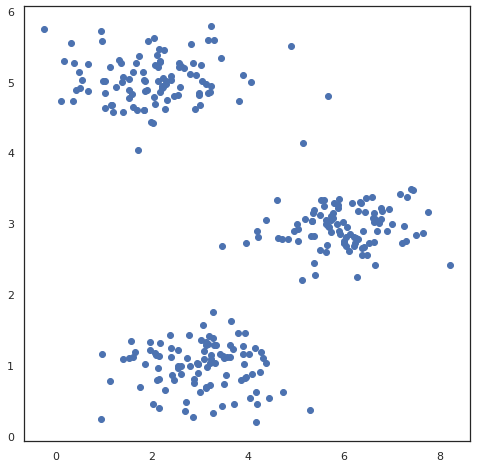

In [7]:
sb.set(context='notebook', style='white')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X[:,0], X[:,1],color='b')
plt.show()

In [8]:
# 运行K-means算法进行聚类
idx, centroids = k_means(X, 3, 10)

Initial centeroids:[[2.16979227 5.27435354]
 [1.60493227 5.13663139]
 [6.33559522 3.30864291]]


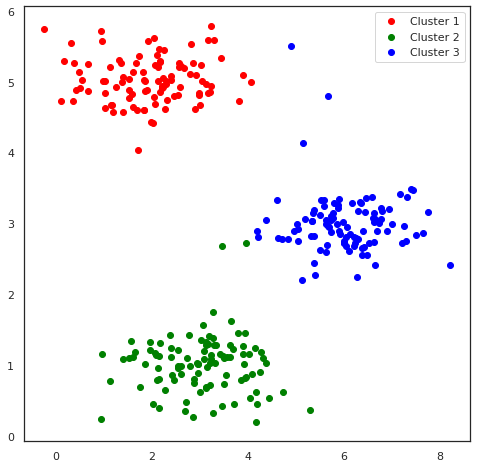

In [9]:
# 绘制聚类效果图
X_1 = X[np.where(idx==0)[0]]
X_2 = X[np.where(idx==1)[0]]
X_3 = X[np.where(idx==2)[0]]

fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1)
ax.scatter(X_1[:,0], X_1[:,1], color='red', label='Cluster 1')
ax.scatter(X_2[:,0], X_2[:,1], color='green', label='Cluster 2')
ax.scatter(X_3[:,0], X_3[:,1], color='blue', label='Cluster 3')
ax.legend(loc=0)
plt.show()

## 7.2图像压缩

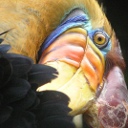

In [10]:
from IPython.display import Image
Image(filename='./data/bird_small.png')

In [11]:
image_data = loadmat('data/bird_small.mat')
A = image_data['A']
A.shape

(128, 128, 3)

In [12]:
A = A/255
X_img = A.reshape([A.shape[0]*A.shape[1], A.shape[2]])
X_img.shape

(16384, 3)

In [13]:
idx_img, centroids_img = k_means(X_img, 16, 10)

Initial centeroids:[[0.48627451 0.30196078 0.07058824]
 [0.48235294 0.29411765 0.10196078]
 [0.55294118 0.38823529 0.37647059]
 [0.82745098 0.76078431 0.78431373]
 [0.15686275 0.18039216 0.18039216]
 [0.78039216 0.69019608 0.65098039]
 [0.58823529 0.4745098  0.22352941]
 [0.94509804 0.72156863 0.32156863]
 [0.86666667 0.74901961 0.49019608]
 [0.15294118 0.15294118 0.12941176]
 [0.08627451 0.10196078 0.08235294]
 [0.99215686 0.90196078 0.69411765]
 [0.85490196 0.70980392 0.43529412]
 [0.98823529 0.98431373 0.79607843]
 [0.10980392 0.11372549 0.09803922]
 [0.92941176 0.6        0.20784314]]


In [14]:
# 将每一个像素的RGB映射至最终的聚类中心
for i in range(centroids_img.shape[0]):
    X_img[np.where(idx_img == i)[0]] = centroids_img[i]
# 还原图形
A_recovered = X_img.reshape([A.shape[0], A.shape[1], A.shape[2]])
A_recovered.shape

(128, 128, 3)

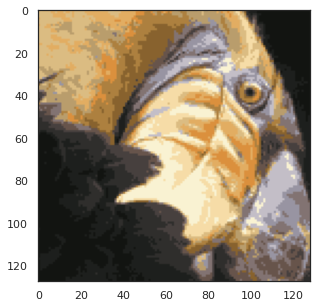

In [15]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(A_recovered)
plt.show()

In [16]:
# 使用scikit-learn实现K-means
from skimage import io
pic = io.imread('./data/bird_small.png')
pic.shape

(128, 128, 3)

In [17]:
data_pic = pic.reshape([pic.shape[0]*pic.shape[1], pic.shape[2]])
data_pic.shape

(16384, 3)

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)
model.fit(data_pic)

/home/qingren/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [19]:
C = model.predict(data_pic)
C.shape,C

((16384,), array([0, 0, 0, ..., 1, 1, 1], dtype=int32))

In [20]:
centroids_C = model.cluster_centers_
centroids_C.shape

(16, 3)

In [21]:
compressed_pic = centroids_C[C].reshape([pic.shape[0], pic.shape[1], pic.shape[2]])
compressed_pic.shape

(128, 128, 3)

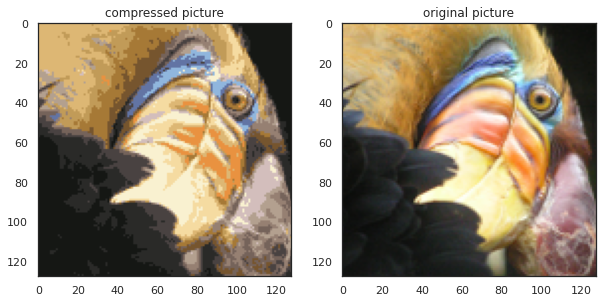

In [22]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(compressed_pic/255)
ax1.set_title('compressed picture')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(pic)
ax2.set_title('original picture')
plt.show()